<a href="https://colab.research.google.com/github/imthadh-ahamed/AI-ML/blob/branch-AIML/Lab_01_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Detect and Remove Outliers

In [1]:
# Importing Necessary Dependencies and load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_boston = pd.read_csv('/content/sample_data/Airdata.csv')

In [3]:
#  Show a preview of the dataset
df_boston.head()

,DateTime,Temperature,Humidity,Wind_Speed,Wind_Direction,NO2_Location_A,NO2_Location_B,NO2_Location_C
0,1/1/2020 0:00,2.180529,87,1.484318,75.963760,39.23,52.88,62.37
1,1/1/2020 1:00,1.490529,89,2.741678,113.198590,38.30,44.95,52.53
2,1/1/2020 2:00,1.690529,85,3.563818,135.000000,NaN,48.40,54.80
3,1/1/2020 3:00,1.430529,84,2.811690,129.805570,37.28,47.18,50.80
4,1/1/2020 4:00,0.840529,86,1.800000,126.869896,29.97,41.48,54.43


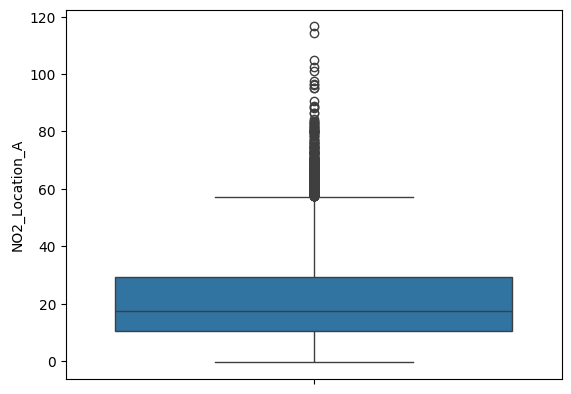

In [4]:
# Generate a Box-plot for the NO2_Location_A feature
sns.boxplot(df_boston['NO2_Location_A'])
plt.show()

In [6]:
# Finding the IQR
percentile25 = df_boston['NO2_Location_A'].quantile(0.25)
percentile75 = df_boston['NO2_Location_A'].quantile(0.75)
iqr = percentile75-percentile25
iqr

18.700000000000003

In [7]:
#  Finding upper and lower limit
upper_limit = percentile75 + (1.5 * iqr)
lower_limit = percentile25 - (1.5 * iqr)
print(upper_limit, lower_limit)

57.35000000000001 -17.450000000000003


Capping is a technique used in data preprocessing to limit the range of data within a specific interval, typically between a lower and an upper limi

In [8]:
# Capping
new_df_cap = df_boston.copy()
new_df_cap['NO2_Location_A'] = np.where(
  new_df_cap['NO2_Location_A'] >= upper_limit, upper_limit,
  np.where(new_df_cap['NO2_Location_A'] <= lower_limit, lower_limit,
  new_df_cap['NO2_Location_A']
  )
)

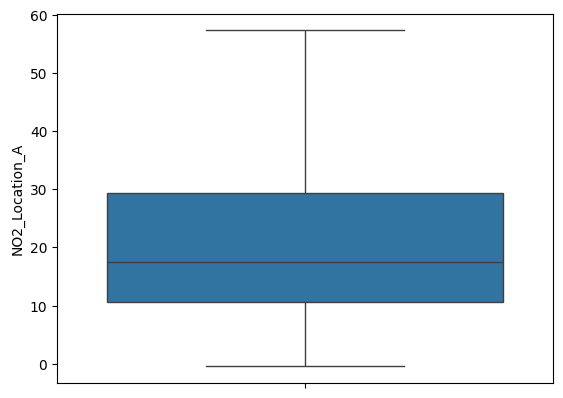

In [9]:
# Draw boxplot after capping
sns.boxplot(new_df_cap['NO2_Location_A'])
plt.show()